# Naiwny klasyfikator bayesowski

ZADANIE:

Wyobraźmy sobie test na chorobę X. Testy wykrywa prawdidłowo 90% chorych, ale jeśli testowi poddaje się osoba zdrowa myli się w 30% przypadków. Choroba X dotyka średnio 10% populacji. 

Jakie jest prawdodpodobieństwo, że osoba, która poddała się testowi i otrzymała wynik pozytywny (chora), jest zdrowa?

P(A|B) = (P(B|A) * P(A)) / P(B)

P(A|B) - prawdopodobieństwo zdarzenia A(zdrowa) przy zdarzeniu B(pozytywny wyniki testu) <br>
P(B|A) - prawdopodbieństwo, że test dał pozytywny wynik jeśli osoba jest zdrowa = 0.3 <br>
P(A) - prawdopodobieństwo, że osoba jest zdrowa = 0.9 <br>
P(B) - prawdopodobieńśtwo, że test dał pozytywny wynik.

P(B) <br>

10 osób na 100 jewst chorych. Spośród chorych 9 otrzyma pozytywny wynik testu. <br>
90 osób jest zdrowych. Spośród zdrowych, 27 osób otrzyma pozytywny wynik testu. <br>
36 osób otrzyma pozytywny wynik testu (będzie klasyfikował jako chore).

In [53]:
0.3*0.9/0.36

0.7500000000000001

## Budowa modelu na danych rzeczywistych

Po pierwsze, musimy zaimportować dane. Pobierzmy sobie zatem zbiory z githuba.

In [54]:
!git clone https://github.com/matzim95/ML-datasets


fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [55]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

### Wczytanie zbioru

Glass

In [56]:
glass, glass_classes = load_dataset('glass', 'Type', 'ID')

In [57]:
glass.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [58]:
print(glass_classes)

['building_windows_float_processed' 'building_windows_non_float_processed'
 'vehicle_windows_float_processed' 'containers' 'tableware' 'headlamps']


Wine

In [88]:
glass, glass_classes = load_dataset('glass', 'Type', 'ID')

In [89]:
print(glass_classes)

glass.head()

['building_windows_float_processed' 'building_windows_non_float_processed'
 'vehicle_windows_float_processed' 'containers' 'tableware' 'headlamps']


,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


### Normalizacja / standaryzacja

In [59]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

normalizer = Normalizer()
standarizer = StandardScaler()
minmax = MinMaxScaler()

In [60]:
y = glass.pop('class')
X = glass

glass.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [61]:
X_normalize = X.copy()

normalizer.fit(X)
X_matrix = normalizer.transform(X)

X_normalize[:] = X_matrix

In [62]:
X_normalize

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
ID,,,,,,,,,
1,0.020625,0.184956,0.060884,0.014916,0.973323,0.000814,0.118648,0.000000,0.0
2,0.020350,0.186259,0.048274,0.018237,0.975277,0.006437,0.104997,0.000000,0.0
3,0.020282,0.180987,0.047487,0.020600,0.976368,0.005217,0.104071,0.000000,0.0
4,0.020404,0.177605,0.049611,0.017344,0.976220,0.007663,0.110515,0.000000,0.0
5,0.020279,0.177341,0.048378,0.016571,0.976647,0.007350,0.107848,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
210,0.020319,0.189493,0.000000,0.038596,0.973063,0.001072,0.123023,0.014205,0.0
211,0.020198,0.198674,0.000000,0.026499,0.972861,0.000000,0.111854,0.021172,0.0
212,0.020182,0.190587,0.000000,0.026810,0.974438,0.000000,0.112017,0.021766,0.0


In [63]:
X_normalize.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.020373,0.179893,0.036079,0.019389,0.974684,0.006695,0.120183,0.002353,0.000766
std,0.000214,0.010981,0.019395,0.006734,0.002748,0.008941,0.019227,0.006722,0.001311
min,0.019452,0.146107,0.000000,0.003909,0.960172,0.000000,0.072963,0.000000,0.000000
25%,0.020258,0.173025,0.028478,0.015932,0.973149,0.001663,0.110382,0.000000,0.000000
50%,0.020338,0.178892,0.046603,0.018337,0.975522,0.007438,0.115211,0.000000,0.000000
75%,0.020479,0.186234,0.048366,0.021840,0.976717,0.008155,0.124221,0.000000,0.001343
max,0.021270,0.223717,0.060884,0.048796,0.979958,0.085825,0.221568,0.043756,0.006890


In [64]:
X_standarize = X.copy()

standarizer.fit(X)
X_matrix = standarizer.transform(X)

X_standarize[:] = X_matrix

In [65]:
X_standarize.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [66]:
X_minmax = X.copy()

minmax.fit(X)
X_matrix = minmax.transform(X)

X_minmax[:] = X_matrix

Możemy już przejść do zdefiniowania modelu i jego walidacji

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

Modele na danych normalizowanych MinMaxScalerem

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, stratify = y, random_state = 30)

In [91]:
y_train.head()

ID
45     0
196    3
202    3
23     0
207    3
Name: class, dtype: int8

In [92]:
X_train.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
ID,,,,,,,,,
45,0.294557,0.300752,0.763920,0.280374,0.560714,0.099839,0.309480,0.000000,0.588235
196,0.188762,0.512782,0.000000,0.744548,0.639286,0.012882,0.338290,0.193651,0.098039
202,0.236172,0.183459,0.000000,0.280374,0.958929,0.434783,0.325279,0.000000,0.000000
23,0.272608,0.308271,0.806236,0.311526,0.532143,0.095008,0.303903,0.000000,0.000000
207,0.232660,0.633083,0.000000,0.492212,0.589286,0.000000,0.301115,0.438095,0.000000


In [93]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

for classifier in [MultinomialNB(), GaussianNB(), BernoulliNB()]:

  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  print_results(calculate_metrics(y_test, y_pred), classifier_id = str(classifier))

Results for MultinomialNB()
----
  Accuracy:  0.42592592592592593
  Precision: 0.31140350877192985
  Recall:    0.22928849902534112
  F1 score:  0.22145467836257313
  Mislabeled 31 out of 54


Results for GaussianNB()
----
  Accuracy:  0.2777777777777778
  Precision: 0.49313725490196075
  Recall:    0.47819200779727095
  F1 score:  0.41675020885547204
  Mislabeled 39 out of 54


Results for BernoulliNB()
----
  Accuracy:  0.46296296296296297
  Precision: 0.2871794871794872
  Recall:    0.32115009746588696
  F1 score:  0.30128205128205127
  Mislabeled 29 out of 54




C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kacper\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model na zbiorze wine

In [94]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)
wine.head()

['one' 'two' 'three']


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [95]:
y = wine.pop('class')
X = wine

In [96]:
X_minmax = X.copy()

minmax.fit(X)
X_matrix = minmax.transform(X)

X_minmax[:] = X_matrix

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, stratify = y, random_state = 30)

In [98]:
gbc = GaussianNB()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print_results(calculate_metrics(y_test, y_pred))

Results for classifier
----
  Accuracy:  0.9777777777777777
  Precision: 0.9791666666666666
  Recall:    0.9814814814814815
  F1 score:  0.9797235023041475
  Mislabeled 1 out of 45




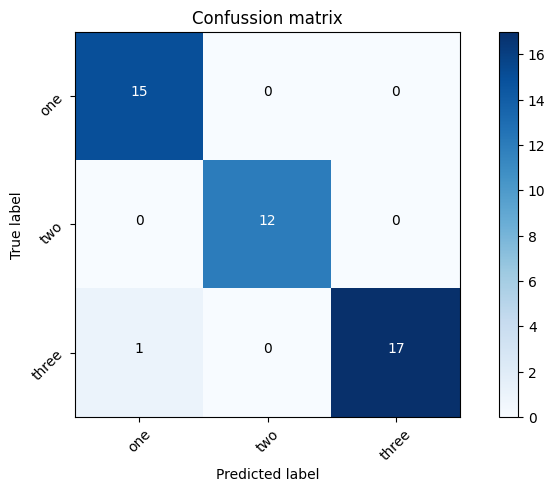

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (10,5))

img = ax.imshow(cm, cmap = plt.cm.Blues)

ax.figure.colorbar(img, ax = ax)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_xticklabels(wine_classes, rotation = 45)

ax.set_yticks(np.arange(cm.shape[0]))
ax.set_yticklabels(wine_classes, rotation = 45)

ax.set_title('Confussion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

for y, row in enumerate(cm):
  for x, cell in enumerate(row):
    ax.text(x,y, format(cell, 'd'), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

In [108]:
def plot_confussion_matrix(cm, classes, title=None, title_appendix = '', cmap = plt.cm.Blues):
    #Obsługa tytułu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots(figsize = (10,5))

    img = ax.imshow(cm, cmap = plt.cm.Blues)

    ax.figure.colorbar(img, ax = ax)

    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_xticklabels(classes, rotation = 45)

    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_yticklabels(classes, rotation = 45)

    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    for y, row in enumerate(cm):
      for x, cell in enumerate(row):
        ax.text(x,y, format(cell, 'd'), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')
    fig.tight_layout()
    
    return ax

<AxesSubplot: title={'center': 'Confusion matrix (GNB)'}, xlabel='Predicted label', ylabel='True label'>

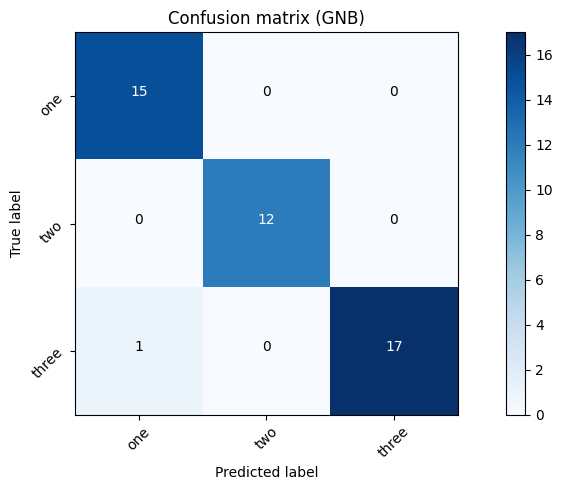

In [109]:
plot_confussion_matrix(cm, wine_classes, title_appendix= 'GNB')

A na co się przydaje ta dyskretyzacja? Sprawdźmy!

In [113]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


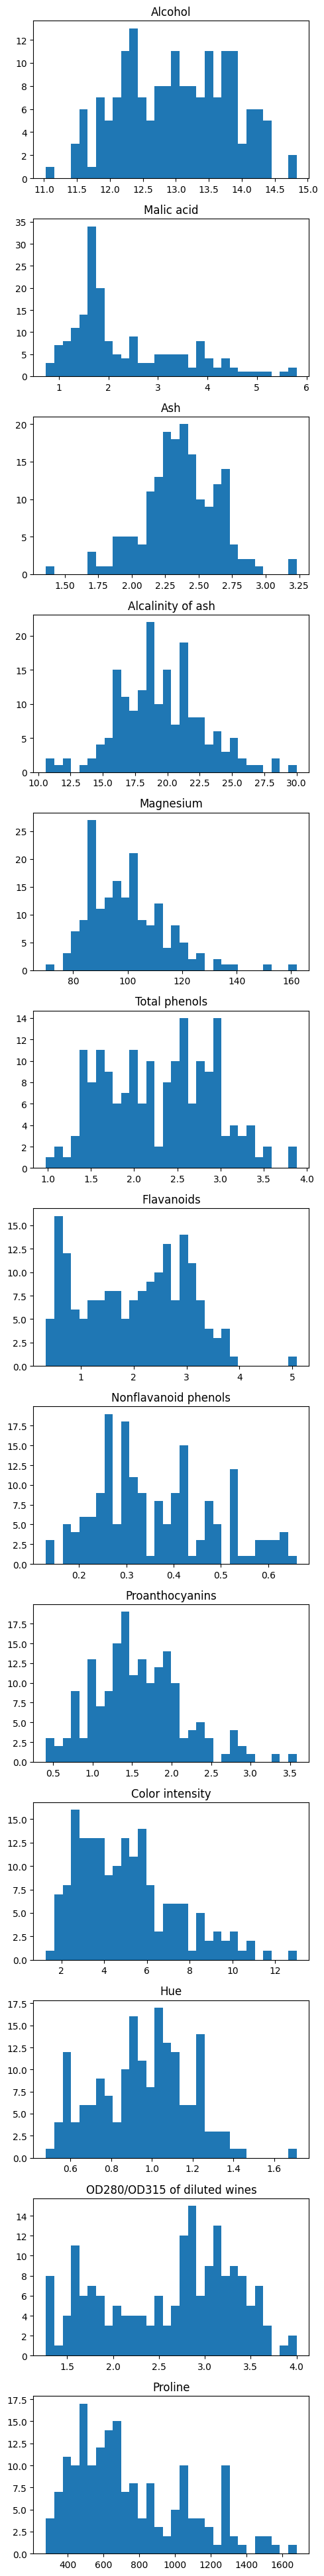

In [112]:
fig, axs = plt.subplots(len(X.columns), figsize = (5, len(X.columns)*3))

for index, column in enumerate(X):
  axs[index].hist(X[column], bins = 30)
  axs[index].set_title(column)
plt.tight_layout()
plt.show()

Zdefiniujmy sobie różne funkcje do dyskretyzacji, korzystając z pandasowych:
* pd.cut()
* pd.qcut()

In [114]:
pd.cut(X['Alcohol'],bins = 3).value_counts()

(12.297, 13.563]    86
(13.563, 14.83]     51
(11.026, 12.297]    41
Name: Alcohol, dtype: int64

In [115]:
pd.qcut(X['Alcohol'],q = 3).value_counts()

(11.029, 12.52]    60
(12.52, 13.48]     59
(13.48, 14.83]     59
Name: Alcohol, dtype: int64

Funkcje przeprowadzające kategoryzację:

In [119]:
def equal_lenght(column, n_bins):
    indicies, bins = pd.cut(column, n_bins, retbins = True, labels = False, duplicates = 'drop')
    
    return indicies.map(dict(enumerate(bins)))

lenght_bin = lambda x: equal_lenght(x, 5)

In [120]:
X_1 = X.apply(lenght_bin)

In [122]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [121]:
X_1

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.07,0.73494,2.108,14.4800,125.2,2.72,2.23600,0.236,1.678,3.624,0.97200,3.45400,838.8
1,12.55,1.75200,2.108,10.5806,88.4,2.14,2.23600,0.236,1.044,3.624,0.97200,2.90800,838.8
2,12.55,1.75200,2.482,18.3600,88.4,2.72,3.18400,0.236,2.312,3.624,0.97200,2.90800,1119.2
3,14.07,1.75200,2.482,14.4800,106.8,3.30,3.18400,0.236,1.678,5.968,0.72600,2.90800,1399.6
4,12.55,1.75200,2.856,18.3600,106.8,2.72,2.23600,0.342,1.678,3.624,0.97200,2.90800,558.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.31,4.78800,2.108,18.3600,88.4,1.56,0.33526,0.448,1.044,5.968,0.47877,1.26727,558.4
174,13.31,3.77600,2.108,22.2400,88.4,1.56,0.33526,0.342,1.044,5.968,0.47877,1.26727,558.4
175,12.55,3.77600,2.108,18.3600,106.8,1.56,0.33526,0.342,1.044,8.312,0.47877,1.26727,558.4
176,12.55,1.75200,2.108,18.3600,106.8,1.56,0.33526,0.448,1.044,8.312,0.47877,1.26727,838.8


## Granice decyzyjne na sztucznie wygenerowanym zbiorze:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))

train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

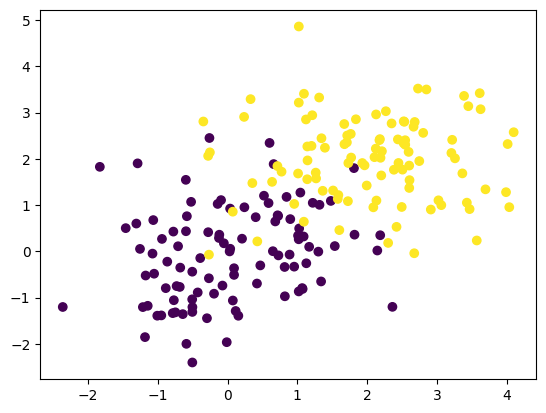

In [7]:
fig, ax = plt.subplots()

ax.scatter(train_data[:,0], train_data[:,1], c =train_labels)

In [8]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
model = GaussianNB()
model.fit(train_data, train_labels)

GaussianNB()

In [9]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [10]:
y_pred_matrix = y_pred.reshape(xs.shape)

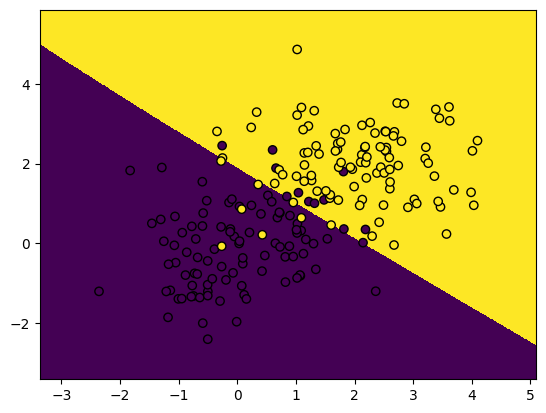

In [11]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()